In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from IPython.display import display

In [4]:
# Load Dataset 
df = pd.read_csv('../data/df_file.csv')

In [11]:
# Display Basic Info
print("Dataset Overview")
display(df.head())

Dataset Overview


,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [6]:
# Display Dataset Shape
print("\nDataset Shape:")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Dataset Shape:
Number of Rows: 2225
Number of Columns: 2


In [7]:
# Display Column Names and Data Types
print("\nColumn Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Text     object
Label     int64
dtype: object


In [12]:
# Step 1: Text Preprocessing
print("# Step 1: Text Preprocessing - Tokenization & Vectorization")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# Step 1: Text Preprocessing - Tokenization & Vectorization


In [13]:
# Convert TF-IDF Matrix to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("## Sample TF-IDF Values")
display(tfidf_df.head())

## Sample TF-IDF Values


,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.105936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 2: Word Cloud Visualization


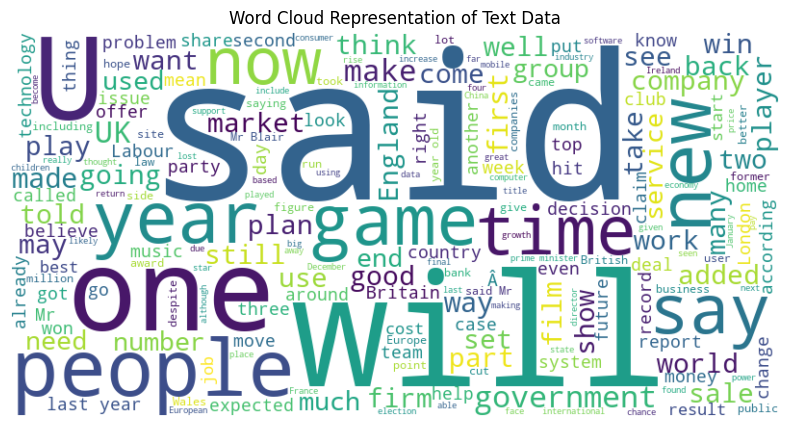

In [14]:
# Step 2: Word Cloud Visualization
print("# Step 2: Word Cloud Visualization")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Representation of Text Data")
plt.show()

# Step 3: Term Frequency Heatmap (Improved)


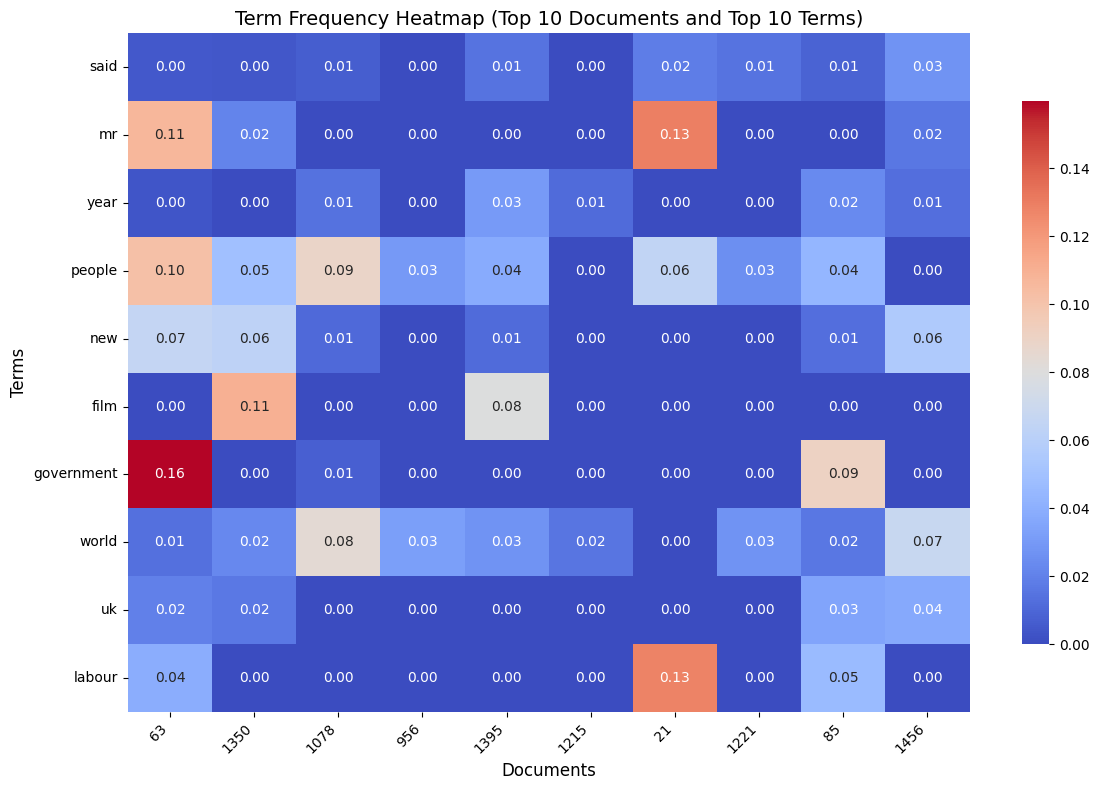

In [17]:
# Step 3: Term Frequency Heatmap 
print("# Step 3: Term Frequency Heatmap (Improved)")

# Select top 10 documents and top 10 terms for visualization
top_documents = 10  
top_terms = 10      

top_terms_indices = tfidf_df.mean(axis=0).sort_values(ascending=False).index[:top_terms]

top_documents_indices = tfidf_df.mean(axis=1).sort_values(ascending=False).index[:top_documents]

# Create a subset of the TF-IDF matrix for visualization
tfidf_subset = tfidf_df.loc[top_documents_indices, top_terms_indices]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    tfidf_subset.T,  
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10},  
    cbar_kws={'shrink': 0.8}  
)
plt.title("Term Frequency Heatmap (Top 10 Documents and Top 10 Terms)", fontsize=14)
plt.xlabel("Documents", fontsize=12)
plt.ylabel("Terms", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout() 
plt.show()

# Step 4: Inverse Document Frequency (IDF) Analysis


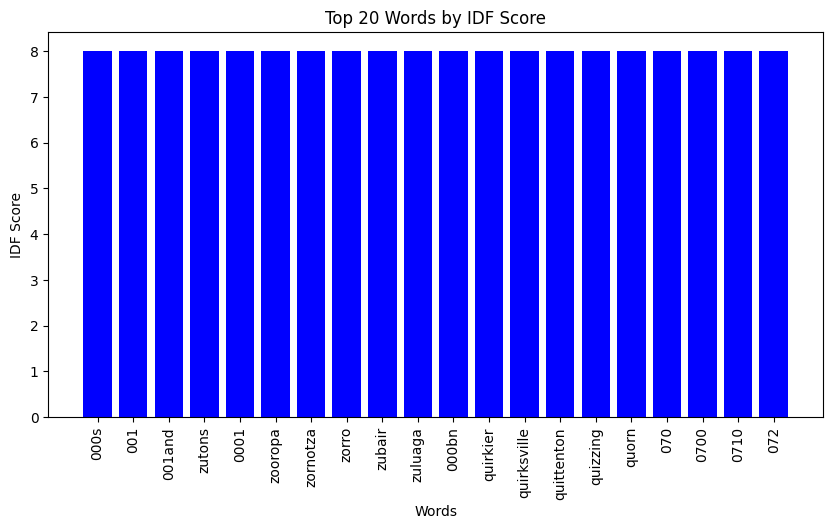

In [18]:
# Step 4: Inverse Document Frequency (IDF) Calculation & Visualization
print("# Step 4: Inverse Document Frequency (IDF) Analysis")
idf_values = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
idf_df = pd.DataFrame(list(idf_values.items()), columns=['Word', 'IDF']).sort_values(by='IDF', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(idf_df['Word'][:20], idf_df['IDF'][:20], color='blue')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("IDF Score")
plt.title("Top 20 Words by IDF Score")
plt.show()

# Step 5: TF-IDF Score Distribution


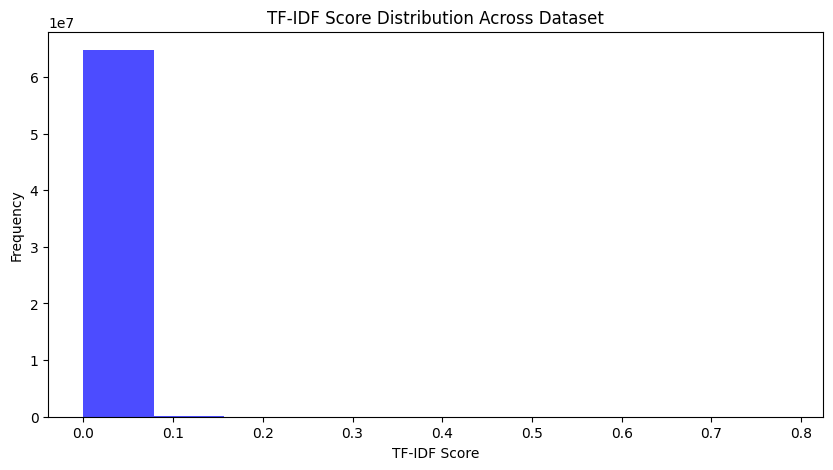

In [22]:
# Step 5: TF-IDF Score Distribution
print("# Step 5: TF-IDF Score Distribution")
plt.figure(figsize=(10, 5))
plt.hist(X.toarray().flatten(), bins=10, color='blue', alpha=0.7)
plt.xlabel("TF-IDF Score")
plt.ylabel("Frequency")
plt.title("TF-IDF Score Distribution Across Dataset")
plt.show()

In [23]:
# Step 6: Search Functionality - Retrieving Top 3 Relevant Documents
def search_documents(query, top_n=3):
    """
    Given a query, computes similarity scores and retrieves the top N most relevant documents.
    """
    query_vector = vectorizer.transform([query])
    similarity_scores = np.dot(X.toarray(), query_vector.toarray().T).flatten()
    top_indices = np.argsort(similarity_scores)[::-1][:top_n]
    
    print(f"## Top {top_n} Most Relevant Documents for Query: '{query}'")
    results = []
    for idx in top_indices:
        results.append({
            "Document ID": idx + 1,
            "Text": df.iloc[idx]['Text'],
            "Similarity Score": similarity_scores[idx]
        })
    results_df = pd.DataFrame(results)
    display(results_df)
    
    # Visualization of Similarity Scores
    plt.figure(figsize=(8, 4))
    plt.bar(results_df['Document ID'], results_df['Similarity Score'], color='green')
    plt.xlabel("Document ID")
    plt.ylabel("Cosine Similarity Score")
    plt.title(f"Similarity Scores for Query: '{query}'")
    plt.show()

In [28]:
# Step 7: Interactive UI for Search Queries
import ipywidgets as widgets
from IPython.display import clear_output

print("# Step 7: Interactive Search Functionality")
query_input = widgets.Text(
    placeholder='Enter your search query',
    description='Query:',
    disabled=False
)
search_button = widgets.Button(description="Search")

output = widgets.Output()

def on_search_button_clicked(b):
    with output:
        clear_output()
        query = query_input.value
        if query:
            search_documents(query)
        else:
            print("Please enter a valid query.")

search_button.on_click(on_search_button_clicked)

display(query_input, search_button, output)

# Step 7: Interactive Search Functionality


Text(value='', description='Query:', placeholder='Enter your search query')

Button(description='Search', style=ButtonStyle())

Output()

# Step 8: Multiple Query Support
## Top 3 Most Relevant Documents for Query: 'Car models and specifications'


,Document ID,Text,Similarity Score
0,1774,Budget Aston takes on Porsche\n \n British car...,0.156619
1,2213,Saab to build Cadillacs in Sweden\n \n General...,0.149642
2,2068,Fiat chief takes steering wheel\n \n The chief...,0.141454


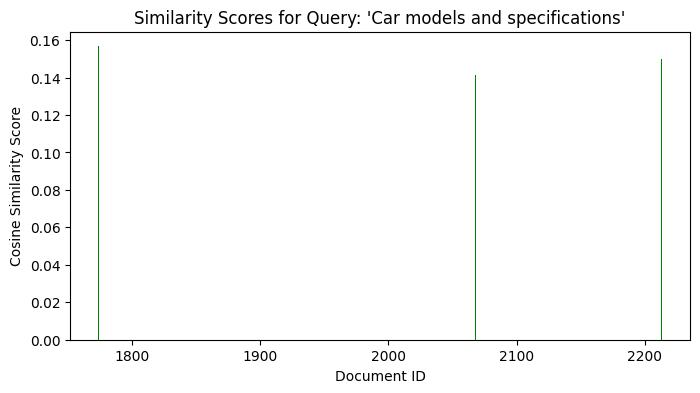

## Top 3 Most Relevant Documents for Query: 'Customer service and support'


,Document ID,Text,Similarity Score
0,1259,UK broadband gets speed injection\n \n Broadba...,0.193427
1,1080,Napster offers rented music to go\n \n Music d...,0.158578
2,973,Napster offers rented music to go\n \n Music d...,0.158578


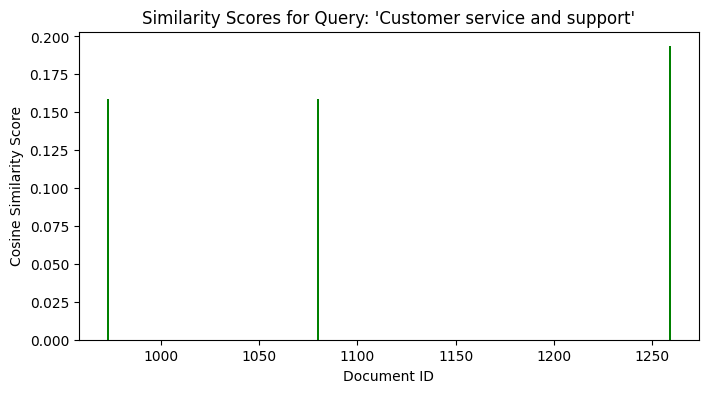

## Top 3 Most Relevant Documents for Query: 'Product reviews and ratings'


,Document ID,Text,Similarity Score
0,1506,EastEnders 'is set for US remake'\n \n Plans t...,0.164817
1,453,White admits to Balco drugs link\n \n Banned A...,0.107384
2,1340,Branson show flops on US screens\n \n Entrepre...,0.087803


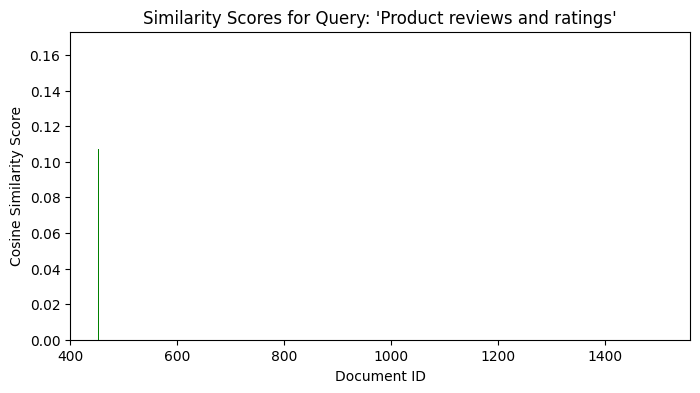

## Top 3 Most Relevant Documents for Query: 'Order tracking and delivery'


,Document ID,Text,Similarity Score
0,2091,Ryanair in $4bn Boeing plane deal\n \n Budget ...,0.134313
1,1763,Economy 'stronger than forecast'\n \n The UK e...,0.058071
2,2165,EU-US seeking deal on air dispute\n \n The EU ...,0.057675


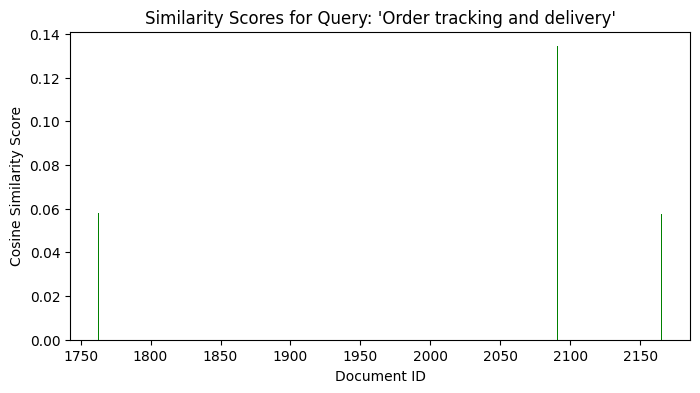

## Top 3 Most Relevant Documents for Query: 'Payment options and refunds'


,Document ID,Text,Similarity Score
0,1099,BT program to beat dialler scams\n \n BT is in...,0.075775
1,1902,Britannia members' Â£42m windfall\n \n More th...,0.071079
2,292,Minimum rate for foster parents\n \n Foster ca...,0.067550


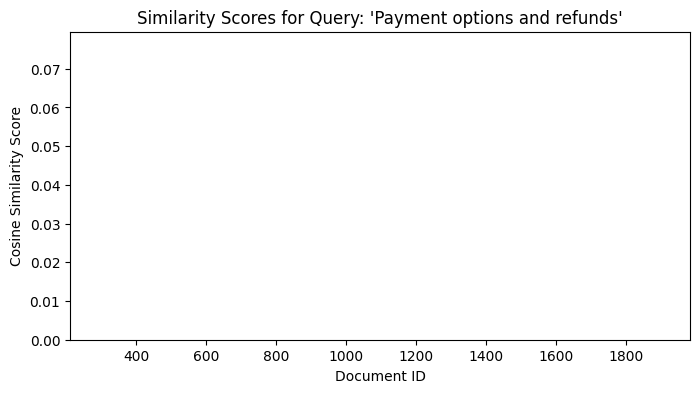

## Top 3 Most Relevant Documents for Query: 'Warranty information'


,Document ID,Text,Similarity Score
0,295,Watchdog probes e-mail deletions\n \n The info...,0.327621
1,1103,Warning over Windows Word files\n \n Writing a...,0.289181
2,216,'Few ready' for information act\n \n Thousands...,0.287706


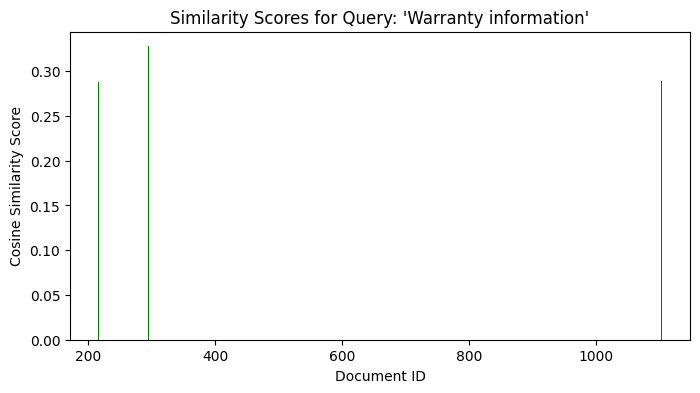

## Top 3 Most Relevant Documents for Query: 'Contact information and locations'


,Document ID,Text,Similarity Score
0,295,Watchdog probes e-mail deletions\n \n The info...,0.126115
1,1103,Warning over Windows Word files\n \n Writing a...,0.111318
2,216,'Few ready' for information act\n \n Thousands...,0.110750


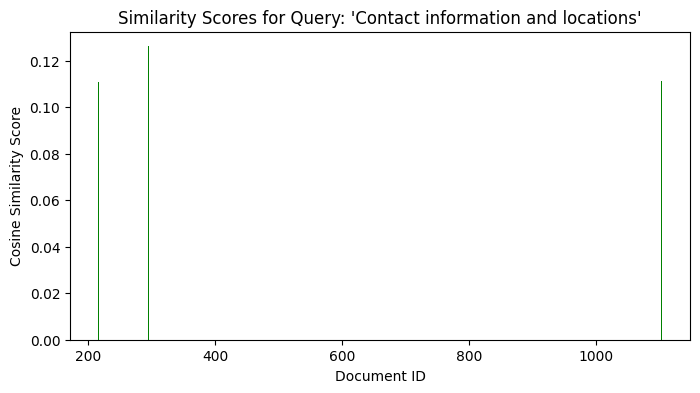

In [30]:
# Step 8: Multiple Query Support
print("# Step 8: Multiple Query Support")
queries = [
    "Car models and specifications",
    "Customer service and support",
    "Product reviews and ratings",
    "Order tracking and delivery",
    "Payment options and refunds",
    "Warranty information",
    "Contact information and locations",
]

for query in queries:
    if query.strip():
        search_documents(query.strip())